In [1]:
import keras
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape

Using TensorFlow backend.


In [2]:
# Show some metadata of the dataset.
import pickle

# ***** You can change the dataset name here to train with different dataset ******
with open('ToySet_rgb.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')


data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)
data['y_test'] = to_categorical(data['y_test'], num_classes=43)

# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

# Showing loaded data from file
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)

x_train: (540, 32, 32, 3)
y_train: (540, 43)
x_validation: (90, 32, 32, 3)
y_validation: (90, 43)
x_test: (180, 32, 32, 3)
y_test: (180, 43)
labels: 43


In [3]:
# Model 1
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -------------------------------------------------------------------------------------------------------------
# Model 2 (Uncomment the code to create model 2)

# model = Sequential()
# model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(32,32,3)))
# model.add(MaxPool2D(pool_size=2))
# model.add(Conv2D(32, (3, 3),activation='relu'))
# model.add(MaxPool2D(pool_size=2))
# model.add(Conv2D(64, (3, 3),activation='relu'))
# model.add(MaxPool2D(pool_size=2))
# model.add(Flatten()) 
# model.add(Dense(500))
# model.add(Activation('relu'))
# model.add(Dense(43))
# model.add(Activation('softmax'))
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -------------------------------------------------------------------------------------------------------------------
# Model 3 (Uncomment the code to create model 3)

# model = Sequential()
# model.add(Conv2D(32, (3, 3), border_mode='same',
#                           input_shape=(32,32,3)))
# model.add(Activation('relu'))
# model.add(Conv2D(32, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=2))
# #model.add(Dropout(0.5))  
#   # Add another convolution layer:
# model.add(Conv2D(64, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
#   # And yet another:
# model.add(Conv2D(64, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=2))
# #model.add(Dropout(0.5)) 
#   # Add a fully-connected layer:
# model.add(Flatten())
# model.add(Dense(500))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
#   # Add a final softmax output layer:
# model.add(Dense(43))
# model.add(Activation('softmax'))
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# set some hyperparameters
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 5

# train the model
h = model.fit(data['x_train'], data['y_train'],
              batch_size=5, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)

Train on 540 samples, validate on 90 samples
Epoch 1/5
540/540 [==============================] - 3s 5ms/step - loss: 0.2384 - accuracy: 0.9370 - val_loss: 0.3566 - val_accuracy: 0.8889
Epoch 2/5
540/540 [==============================] - 1s 1ms/step - loss: 0.0114 - accuracy: 0.9981 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 3/5
540/540 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 0.9778
Epoch 4/5
540/540 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0337 - val_accuracy: 0.9778
Epoch 5/5
540/540 [==============================] - 1s 1ms/step - loss: 9.3230e-04 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9778


In [5]:
# After tranining the model, we can store the model as a .h5 file.
# ***** You can change the model name here to distinguish different dataset&model you used ******
model.save('ToySet_rgb1.h5')

In [6]:
# print some results
print('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
      format(epochs, max(h.history['accuracy']), max(h.history['val_accuracy'])))

Epochs=5, training accuracy=1.00000, validation accuracy=1.00000


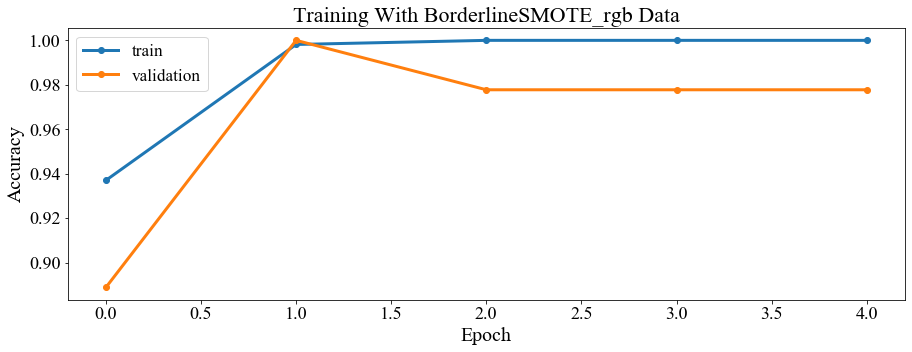

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
#  plot some basic accuracy of this modekl during training.

plt.rcParams['figure.figsize'] = (15.0, 5.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.plot(h.history['accuracy'], '-o', linewidth=3.0)
plt.plot(h.history['val_accuracy'], '-o', linewidth=3.0)
plt.title('Training With BorderlineSMOTE_rgb Data', fontsize=22)
plt.legend(['train', 'validation'], loc='upper left', fontsize='xx-large')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)

# Showing the plot
plt.show()
plt.close()